In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yufengdev/bbc-fulltext-and-category")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bbc-fulltext-and-category' dataset.
Path to dataset files: /kaggle/input/bbc-fulltext-and-category


In [ ]:
import os

print(os.listdir(path))

['bbc-text.csv']


In [ ]:
import pandas as pd
import os

file_path = os.path.join(path, "bbc-text.csv")
df = pd.read_csv(file_path)

In [ ]:
print(df.columns)

Index(['category', 'text'], dtype='object')


In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical columns:", categorical_columns)

Categorical columns: ['category', 'text']


In [ ]:
for col in categorical_columns:
    print(f"Unique categories in '{col}': {df[col].unique()}")

Unique categories in 'category': ['tech' 'business' 'sport' 'entertainment' 'politics']
Unique categories in 'text': ['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes w

/tmp/ipython-input-4003574852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


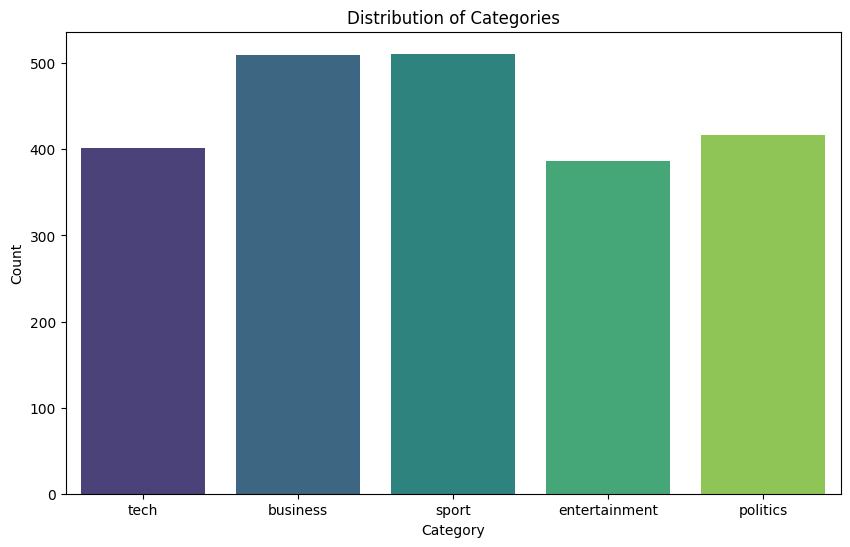

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

def clean_text(text):
    """Cleans the input text."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
display(df.head())

,category,text,cleaned_text
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (2225, 32597)


In [ ]:
# 1. Naive Bayes: A simple yet effective baseline, works well with high-dimensional data like text.
# 2. Logistic Regression: A linear model that's good for binary and multi-class classification and provides probabilities.
# 3. Support Vector Machines (SVM): Often performs well on text classification tasks, especially with a linear kernel for high-dimensional data.

print("Chosen classification models:")
print("- Naive Bayes (e.g., MultinomialNB)")
print("- Logistic Regression")
print("- Support Vector Machines (SVM)")

print("\nJustification:")
print("These models are commonly used and perform well in text classification. Naive Bayes is a good baseline due to its simplicity and effectiveness with text data. Logistic Regression provides probabilistic outputs and is interpretable. SVMs are powerful and often achieve high accuracy, particularly with high-dimensional sparse data like TF-IDF features.")

Chosen classification models:
- Naive Bayes (e.g., MultinomialNB)
- Logistic Regression
- Support Vector Machines (SVM)

Justification:
These models are commonly used and perform well in text classification. Naive Bayes is a good baseline due to its simplicity and effectiveness with text data. Logistic Regression provides probabilistic outputs and is interpretable. SVMs are powerful and often achieve high accuracy, particularly with high-dimensional sparse data like TF-IDF features.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Separate features (tfidf_matrix) and target variable (df['category'])
X = tfidf_matrix
y = df['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
svm_model = SVC()

# Train models
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Naive Bayes model
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

# Evaluate Logistic Regression model
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Store metrics in a dictionary
evaluation_metrics = {
    'Naive Bayes': {
        'Accuracy': nb_accuracy,
        'Precision': nb_precision,
        'Recall': nb_recall,
        'F1-score': nb_f1
    },
    'Logistic Regression': {
        'Accuracy': lr_accuracy,
        'Precision': lr_precision,
        'Recall': lr_recall,
        'F1-score': lr_f1
    },
    'SVM': {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-score': svm_f1
    }
}

# Print evaluation metrics
for model, metrics in evaluation_metrics.items():
    print(f"--- {model} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * (len(model) + 6))

--- Naive Bayes ---
Accuracy: 0.9618
Precision: 0.9631
Recall: 0.9618
F1-score: 0.9616
-----------------
--- Logistic Regression ---
Accuracy: 0.9618
Precision: 0.9626
Recall: 0.9618
F1-score: 0.9618
-------------------------
--- SVM ---
Accuracy: 0.9663
Precision: 0.9671
Recall: 0.9663
F1-score: 0.9664
---------


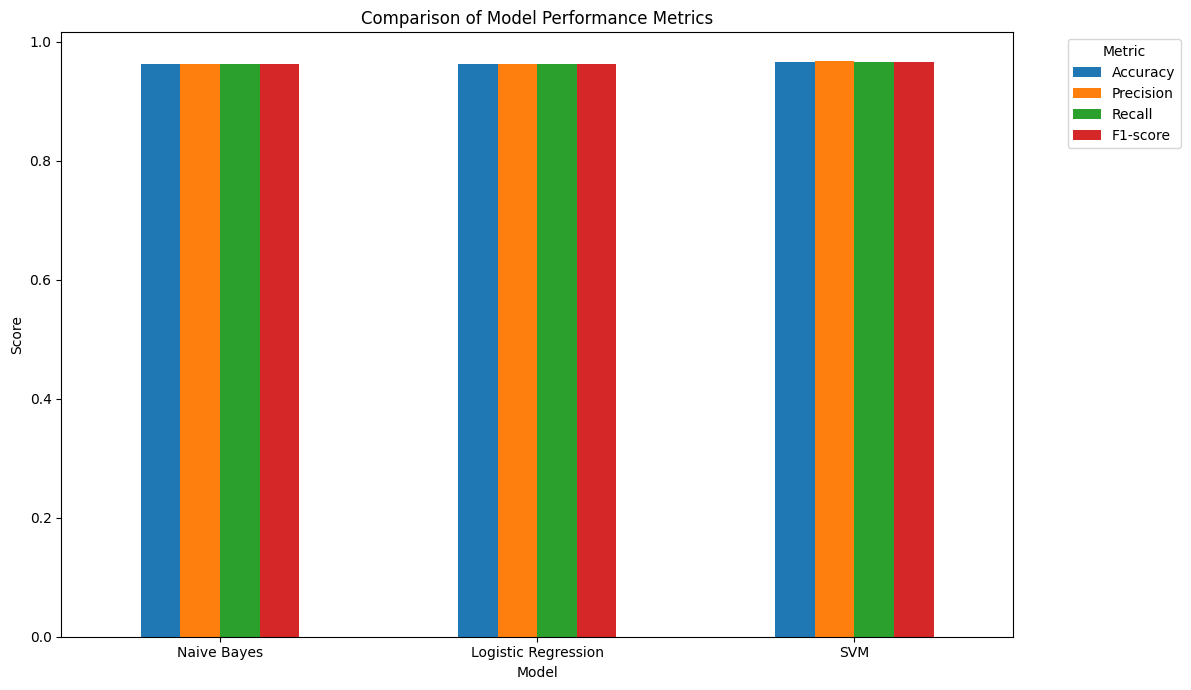

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the evaluation_metrics dictionary
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plot the bar chart
metrics_df.plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained models and vectorizer
joblib.dump(nb_model, 'naive_bayes_model.joblib')
joblib.dump(lr_model, 'logistic_regression_model.joblib')
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Models and vectorizer saved successfully.")

Models and vectorizer saved successfully.
